Para esta parte del proyecto vamos a cargar y analizar el archivo que almacena datos de duración
para limpiarlo y aplicar la regla del negocio que nos ha proporcionado la empresa de que:
**La estancia de un visitante no puede superar las 9 horas.**

In [1]:
#Importar Librerias
import pandas as pd
import numpy as np

# Leemos archivo despues de habernos conectado al DRIVE. Hemos intentado hacerlo sin el argumento lines = True,
# pero nos daba Error. Al investigar, parece que hay que usar ese argumento porque es más eficiente en grandes volúmenes de datos,
#ya que cada línea se puede procesar de manera independiente.

df = pd.read_json('/id_visitante-duracion.json', lines=True)
print(df.head(5))

print(df.columns)

                                                3     \
0  [{'t_id': 'Training_10118481.jpg', 'duracion':...   

                                                4     \
0  [{'t_id': 'Training_10120469.jpg', 'duracion':...   

                                                5     \
0  [{'t_id': 'Training_10131352.jpg', 'duracion':...   

                                                6     \
0  [{'t_id': 'Training_10161559.jpg', 'duracion':...   

                                                7     \
0  [{'t_id': 'Training_1021836.jpg', 'duracion': ...   

                                                8     \
0  [{'t_id': 'Training_10269675.jpg', 'duracion':...   

                                                9     \
0  [{'t_id': 'Training_10278738.jpg', 'duracion':...   

                                                10    \
0  [{'t_id': 'Training_10290703.jpg', 'duracion':...   

                                                11    \
0  [{'t_id': 'Training_10295477.jpg', 'd

como se puede ver el JSON está estructurado de manera que toda la información está contenida en una sola fila, con listas anidadas dentro de cada celda en las 1787 columnas.

In [2]:

df_descompuesto=df.T #invertimos filas y columnas
df_descompuesto=df_descompuesto.explode(0) #Aquí usamos explode(0),
#lo que significa que separaremos los elementos de la columna 0 en filas individuales.
print(df_descompuesto) #Ahora, cada diccionario que estaba en una lista se ha convertido en una fila independiente
df_descompuesto = pd.json_normalize(df_descompuesto[0])#Esto separará "t_id" y "duracion" en columnas diferentes
print(df_descompuesto)

                                                      0
3     {'t_id': 'Training_10118481.jpg', 'duracion': ...
3     {'t_id': 'Training_15361067.jpg', 'duracion': ...
3     {'t_id': 'Training_16232328.jpg', 'duracion': ...
3     {'t_id': 'Training_27705571.jpg', 'duracion': ...
3     {'t_id': 'Training_63766171.jpg', 'duracion': ...
...                                                 ...
1783  {'t_id': 'PublicTest_2529039.jpg', 'duracion':...
1784  {'t_id': 'PublicTest_27916929.jpg', 'duracion'...
1785  {'t_id': 'PublicTest_64107181.jpg', 'duracion'...
1786  {'t_id': 'PublicTest_81098275.jpg', 'duracion'...
1787  {'t_id': 'PublicTest_94828377.jpg', 'duracion'...

[35887 rows x 1 columns]
                          t_id  duracion
0        Training_10118481.jpg       308
1        Training_15361067.jpg       344
2        Training_16232328.jpg       161
3        Training_27705571.jpg       260
4        Training_63766171.jpg       169
...                        ...       ...
35882   PublicT

In [ ]:
#ahora, vamos a ver una descripción de nuestros datos de la columna duración
print(df_descompuesto["duracion"].describe())

count    35887.000000
mean       359.748934
std        100.122517
min        -39.000000
25%        292.000000
50%        359.000000
75%        428.000000
max        811.000000
Name: duracion, dtype: float64


Podemos observar que tenemos un minimo negativo. Es un indicativo de que hay algunos datos erroneos, entonces, tenemos que eliminar esos valores ya que no puede haber tiempos negativos

count    34460.000000
mean       352.794051
std         90.388480
min        100.000000
25%        290.000000
50%        355.000000
75%        419.250000
max        540.000000
Name: duracion, dtype: float64
count    34460.000000
mean       352.794051
std         90.388480
min        100.000000
25%        290.000000
50%        355.000000
75%        419.250000
max        540.000000
Name: duracion, dtype: float64
count    34460.000000
mean       352.794051
std         90.388480
min        100.000000
25%        290.000000
50%        355.000000
75%        419.250000
max        540.000000
Name: duracion, dtype: float64
count    34460.000000
mean       352.794051
std         90.388480
min        100.000000
25%        290.000000
50%        355.000000
75%        419.250000
max        540.000000
Name: duracion, dtype: float64
count    34460.000000
mean       352.794051
std         90.388480
min        100.000000
25%        290.000000
50%        355.000000
75%        419.250000
max        540.000

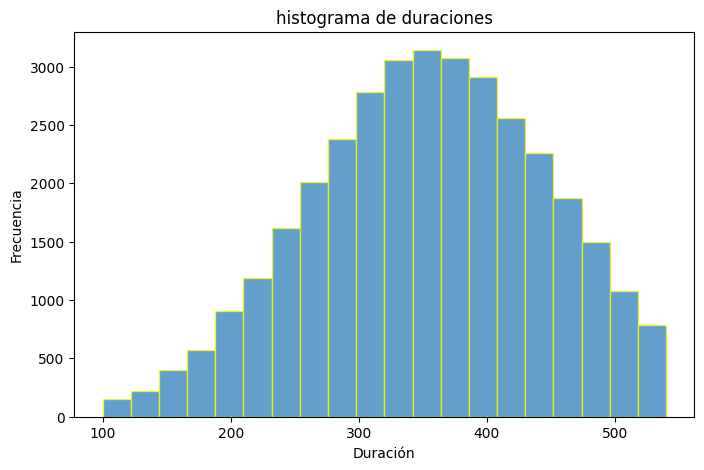

In [ ]:
#eliminamos ese valor negativo y volvemos a describir
df_descompuesto = df_descompuesto[df_descompuesto["duracion"] >= 0]
print(df_descompuesto["duracion"].describe())

#también el proyecto nos dice que no podemos esperar una estancia mayor a 9 horas, lo que son 540 min.
#vamos a eliminar esos valores
df_descompuesto = df_descompuesto[df_descompuesto["duracion"] <= 540]
print(df_descompuesto["duracion"].describe())

df_descompuesto = df_descompuesto.dropna()
print(df_descompuesto["duracion"].describe()) #eliminar nules, no parece que tenga :D

df_descompuesto = df_descompuesto.drop_duplicates()
print(df_descompuesto["duracion"].describe()) #eliminar duplicados, no parece que tenga :D

df_descompuesto = df_descompuesto[df_descompuesto["duracion"] >= 100] #he eliminado los valores <= a 100, y vemos que no ha cambiado mucho
#con lo que creo que no eran tan relevantes, pero ahora nos dan mejor vision de los datos
print(df_descompuesto["duracion"].describe())
print(df_descompuesto.head(5))


# Ruta donde guardar el CSV en Drive
ruta_csv = "/content/drive/MyDrive/PROYECTO JUPITER EMOCIONES/id_visitante-duracion_limpio.csv"

# Guardar como CSV
df_descompuesto.to_csv(ruta_csv, index=False, encoding="utf-8")

#vamos a ver un histograma
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df_descompuesto["duracion"], bins=20, edgecolor="yellow", alpha=0.7)
plt.xlabel("Duración")
plt.ylabel("Frecuencia")
plt.title("histograma de duraciones" )
plt.show()